In [94]:
# !pip install pyarrow
# !pip install fastparquet
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')


In [79]:
df_all = pd.DataFrame()
for i in range(1,5):
    print(i)
    df = pd.read_parquet(f'../data/temp_data{i}.parquet')
    df_all = pd.concat([df_all,df], axis=0)

print(df_all.info())

1
2
3
4
<class 'pandas.core.frame.DataFrame'>
Index: 19740000 entries, fLQPCoYBZfb-6lJn8bNm to zZNJfYYBZfb-6lJnVlhu
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   date        object
 1   @timestamp  object
 2   hostname    object
 3   location    object
 4   cpu1        int64 
 5   cpu2        int64 
 6   power       int64 
 7   kiosk       int64 
 8   rack        int64 
 9   chassis     int64 
 10  blade       int64 
 11  cpus_alloc  int64 
dtypes: int64(8), object(4)
memory usage: 1.9+ GB
None


In [80]:
df = df_all.reset_index(drop=True)

df = df.drop('@timestamp', axis=1)
df['date'] = pd.to_datetime(df['date'])
df.to_parquet('1-22.02.2023_tempdata.parquet')

In [15]:
df.head()

,date,hostname,location,cpu1,cpu2,power,kiosk,rack,chassis,blade,cpus_alloc
0,2023-02-01 00:01:01+01:00,e2120,k06r17c02b16,50,47,572,6,17,2,16,48
1,2023-02-01 00:01:01+01:00,e2109,k06r17c02b05,50,47,568,6,17,2,5,48
2,2023-02-01 00:01:01+01:00,e2207,k06r18c04b07,49,47,552,6,18,4,7,48
3,2023-02-01 00:01:01+01:00,e2147,k06r17c04b11,49,44,500,6,17,4,11,47
4,2023-02-01 00:01:01+01:00,e2396,k06r21c04b04,44,46,492,6,21,4,4,44


In [16]:
df.describe()

,cpu1,cpu2,power,kiosk,rack,chassis,blade,cpus_alloc
count,1.974000e+07,1.974000e+07,1.974000e+07,19740000.0,1.974000e+07,1.974000e+07,1.974000e+07,1.974000e+07
mean,3.674643e+01,3.390597e+01,2.731155e+02,6.0,9.700036e+00,2.494868e+00,8.450577e+00,2.593011e+01
std,8.430784e+00,7.175370e+00,1.352134e+02,0.0,6.486196e+00,1.103700e+00,4.615870e+00,1.807504e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,6.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.900000e+01,2.800000e+01,1.440000e+02,6.0,4.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00
50%,3.500000e+01,3.100000e+01,2.320000e+02,6.0,9.000000e+00,3.000000e+00,8.000000e+00,2.400000e+01
75%,4.500000e+01,4.100000e+01,3.640000e+02,6.0,1.500000e+01,3.000000e+00,1.200000e+01,4.800000e+01
max,7.800000e+01,5.800000e+01,6.400000e+02,6.0,2.100000e+01,4.000000e+00,1.600000e+01,4.800000e+01


<AxesSubplot:>

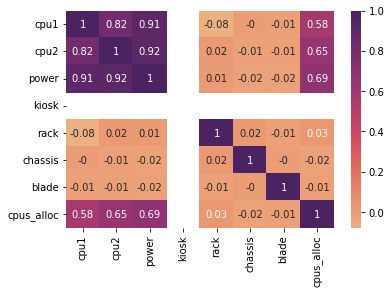

In [19]:
sns.heatmap(df.corr().round(2), annot=True, cmap='flare')


<AxesSubplot:>

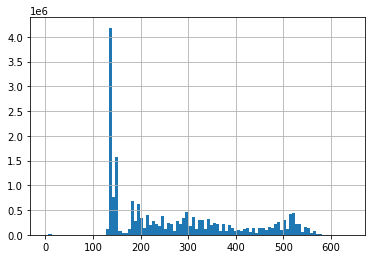

In [28]:
df['power'].hist(bins=100)

140    1650305
136     830997
148     684766
144     394315
152      75544
        ...   
324          1
360          1
348          1
344          1
584          1
Name: power, Length: 85, dtype: int64

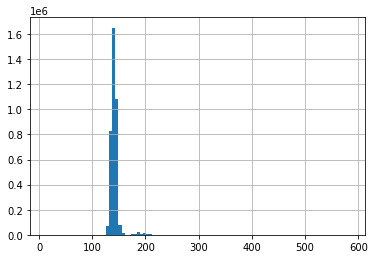

In [31]:
df_nocpu = df[df['cpus_alloc'] == 0]
df_nocpu['power'].hist(bins=100)
df_nocpu['power'].value_counts()

<AxesSubplot:>

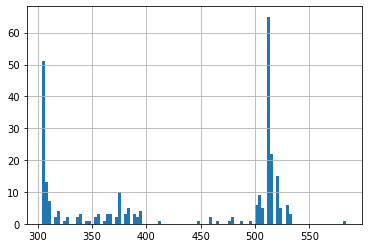

In [30]:
# df_nocpu = df_nocpu[df_nocpu['power'] > 300]

# df_nocpu['power'].hist(bins=100)

In [63]:
print(df_nocpu['hostname'].unique())


['e1924' 'e1448' 'e1443' ... 'e1502' 'e1487' 'e1499']


In [41]:
for elem in df_nocpu['hostname'].unique():
    if df_nocpu[df_nocpu['hostname'] == elem]['power'].mean() > 150:
        print(elem, df_nocpu[df_nocpu['hostname'] == elem]['power'].mean())

e1999 196.7853982300885
e1817 156.3126843657817
e1456 161.80406001765226
e2002 169.73529411764707
e1451 186.07294011706438
e1997 169.8605072463768
e1998 164.8228176318064
e1441 183.25610859728508
e1993 173.86296462158532
e2214 153.9330570608862
e2154 151.12166172106825
e2206 151.09585798816568
e2204 151.00452488687782
e1239 182.28731762065095
e1245 163.60476190476192
e2191 152.58536585365854
e2338 152.52027972027972
e1513 151.66961651917404
e1676 189.4432466708941
e1212 175.31214627775358
e1152 173.73584905660377
e1156 155.7989417989418
e2282 150.9785575048733
e2294 152.2716468590832
e2305 152.1025897660453
e2309 150.1080227416298
e2362 152.96503496503496
e2232 152.0978345536688
e1938 153.5641891891892
e1651 168.8362120309708
e1653 160.5051094890511
e1650 150.09822895745847
e2198 152.58260019550343
e1994 179.0570273911091
e1935 182.89521165857045
e1929 167.78309986443742
e1996 174.01570438799075
e1932 169.53398058252426
e1931 168.86638194020745
e2159 152.8969696969697
e2157 150.0550847

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 103 to 18605551
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype                               
---  ------      --------------  -----                               
 0   date        1808 non-null   datetime64[ns, pytz.FixedOffset(60)]
 1   hostname    1808 non-null   object                              
 2   location    1808 non-null   object                              
 3   cpu1        1808 non-null   int64                               
 4   cpu2        1808 non-null   int64                               
 5   power       1808 non-null   int64                               
 6   kiosk       1808 non-null   int64                               
 7   rack        1808 non-null   int64                               
 8   chassis     1808 non-null   int64                               
 9   blade       1808 non-null   int64                               
 10  cpus_alloc  1808 non-null   int64         

<AxesSubplot:xlabel='date', ylabel='power'>

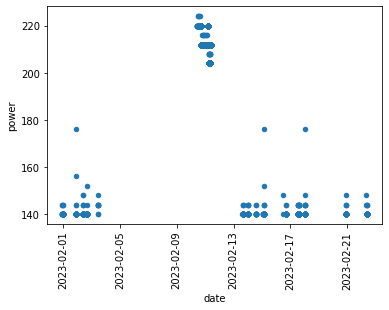

In [65]:
df_res = df_nocpu[df_nocpu['hostname'] == 'e1999']
df_res.info()
df_res.plot(x = 'date', y = 'power', kind='scatter', rot=90)

In [100]:
susp_nodes = []
for elem in df_nocpu['date'].dt.date.unique():
    df_date = df_nocpu[df_nocpu['date'].dt.date == elem]
    df_power = df_date[df_date['power'] > 180]
    print(elem, len(df_power['power']), len(df_power['hostname'].unique()))
    if len(df_power['power'])>30000:
        hostname_list = df_power['hostname'].unique()
        for elem in hostname_list:
            print(elem, len(df_power[df_power['hostname'] == elem]))
            if len(df_power[df_power['hostname'] == elem]) > 400:
                susp_nodes.append(elem)



2023-02-01 396 109
2023-02-02 272 214
2023-02-03 178 123
2023-02-04 64 51
2023-02-05 222 100
2023-02-06 196 155
2023-02-07 280 61
2023-02-08 177 102
2023-02-09 855 11
2023-02-10 13868 46
2023-02-11 31572 60
e1936 992
e1169 178
e1433 222
e1247 992
e1999 665
e1386 982
e1676 992
e1310 982
e1650 982
e1239 992
e1789 992
e1336 982
e1441 979
e1410 991
e1451 979
e1935 991
e1816 979
e1445 992
e1418 988
e1537 991
e2002 991
e1232 991
e1831 992
e1423 991
e1651 990
e1993 991
e1212 991
e1931 991
e1932 991
e1996 808
e1412 281
e1994 982
e1929 5
e1374 2
e2103 1
e2406 1
e2232 1
e1997 2
e1196 2
e1107 495
e1456 484
e1653 493
e2080 484
e2235 494
e1248 4
e2075 31
e1344 41
e1245 3
e1723 1
e2037 1
e1966 1
e1435 184
e1938 2
e1414 1
e1188 1
e2007 1
e1267 1
e2268 1
e1765 1
e1998 1
2023-02-12 43 35
2023-02-13 183 145
2023-02-14 138 118
2023-02-15 68 54
2023-02-16 62 56
2023-02-17 1567 207
2023-02-18 1169 78
2023-02-19 45 43
2023-02-20 517 153
2023-02-21 359 90
2023-02-22 363 219
2023-02-23 4 4


In [101]:
print(susp_nodes) #suspicious nodes

['e1936', 'e1247', 'e1999', 'e1386', 'e1676', 'e1310', 'e1650', 'e1239', 'e1789', 'e1336', 'e1441', 'e1410', 'e1451', 'e1935', 'e1816', 'e1445', 'e1418', 'e1537', 'e2002', 'e1232', 'e1831', 'e1423', 'e1651', 'e1993', 'e1212', 'e1931', 'e1932', 'e1996', 'e1994', 'e1107', 'e1456', 'e1653', 'e2080', 'e2235']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 796653 entries, 8540640 to 9337292
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype                               
---  ------      --------------   -----                               
 0   date        796653 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   hostname    796653 non-null  object                              
 2   location    796653 non-null  object                              
 3   cpu1        796653 non-null  int64                               
 4   cpu2        796653 non-null  int64                               
 5   power       796653 non-null  int64                               
 6   kiosk       796653 non-null  int64                               
 7   rack        796653 non-null  int64                               
 8   chassis     796653 non-null  int64                               
 9   blade       796653 non-null  int64                               
 10  cpus_alloc  796653 non-nu

/opt/exp_soft/local/skylake/python/3.9.2/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


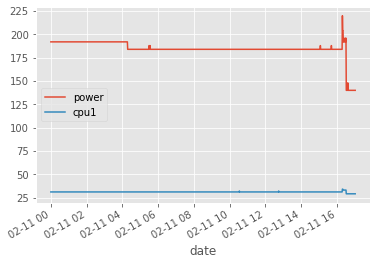

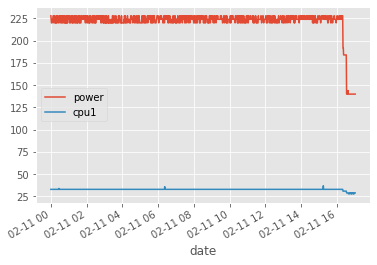

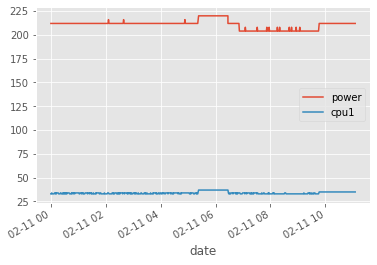

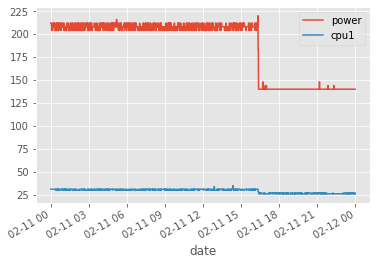

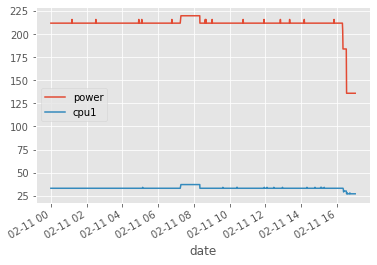

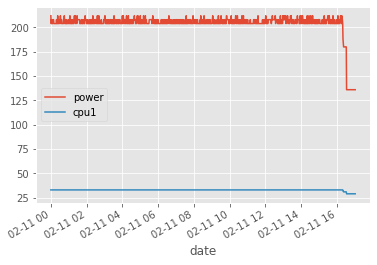

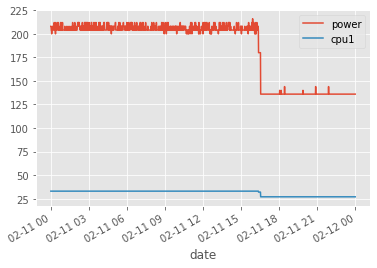

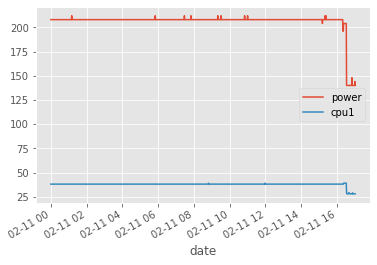

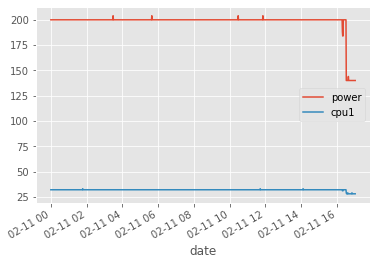

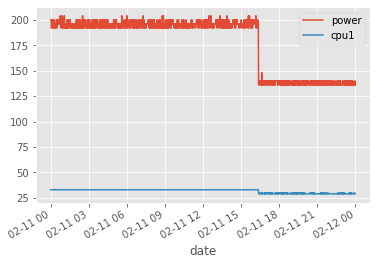

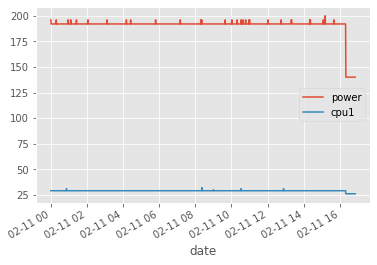

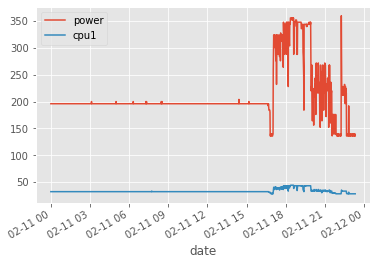

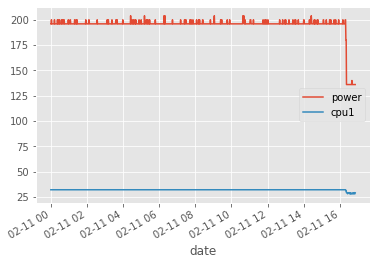

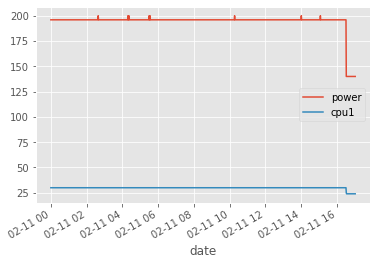

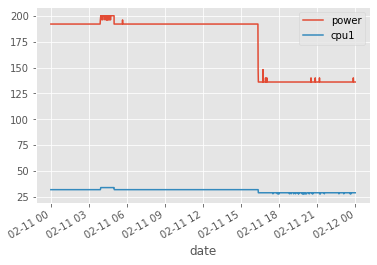

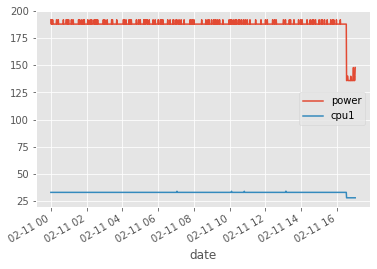

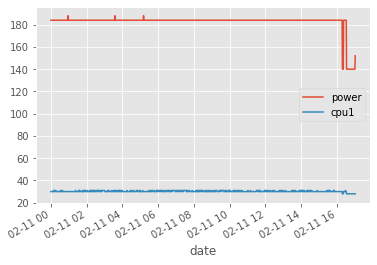

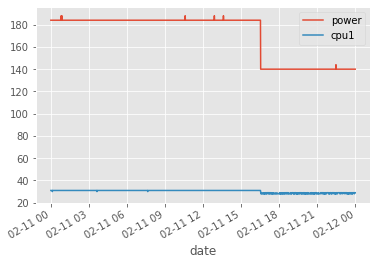

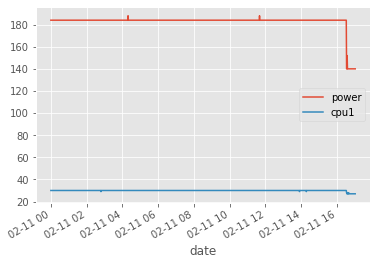

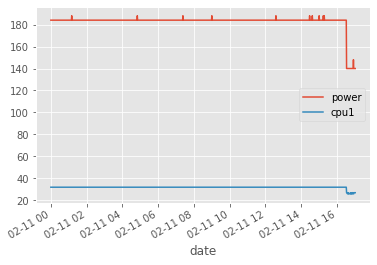

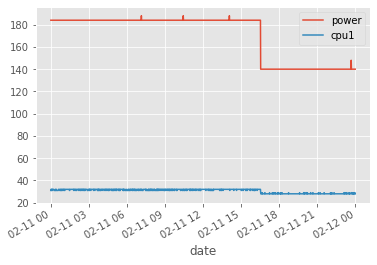

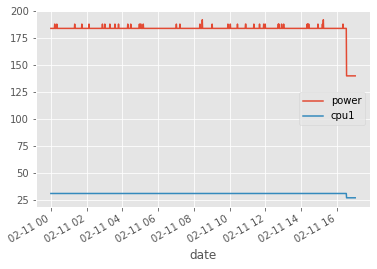

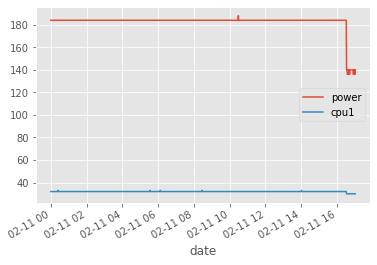

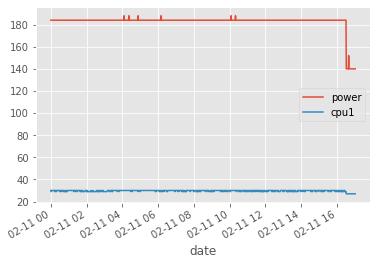

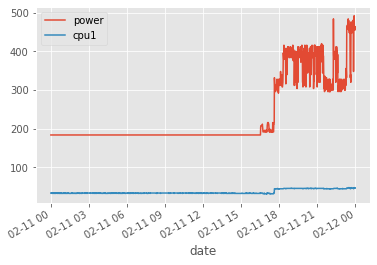

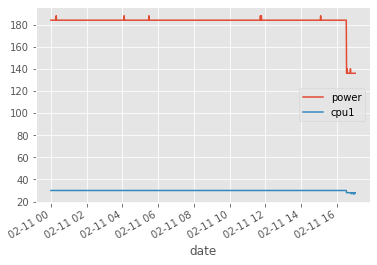

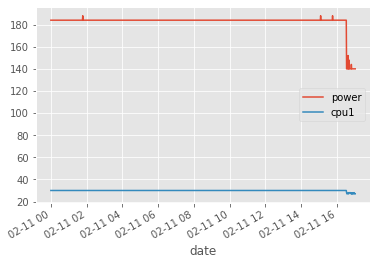

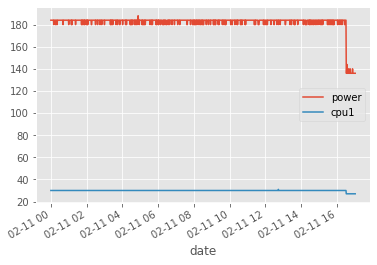

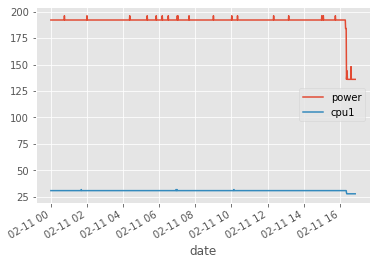

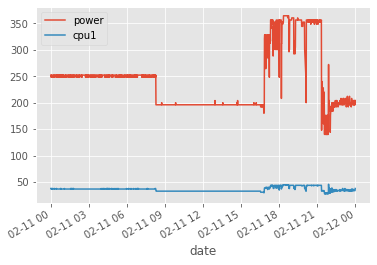

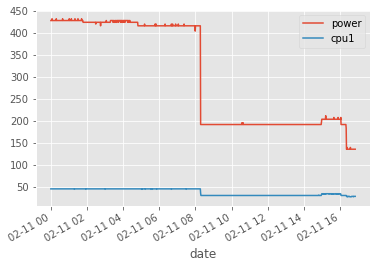

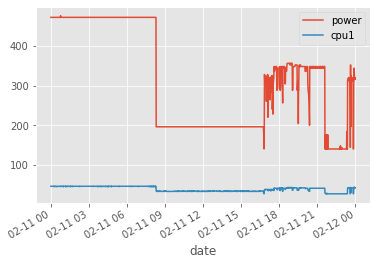

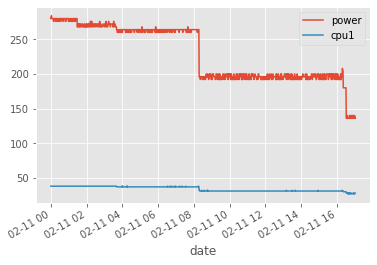

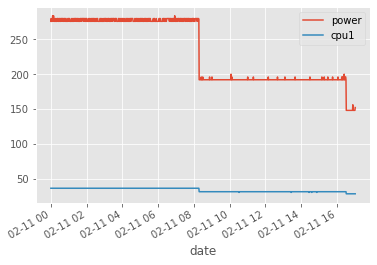

In [103]:
df_host_eda = df[df['date'].dt.date == datetime.date(2023, 2, 11)]
df_host_eda.info()
for elem in susp_nodes:
    df_temp = df_host_eda[df_host_eda['hostname'] == elem]
    df_temp.plot(x='date', y=['power', 'cpu1']) #plot of power value across whole day
    #plt.show()
    